<a href="https://colab.research.google.com/github/chagaibou/student_performance_analysis/blob/main/student_performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
student_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/StudentPerformanceFactors.csv')
student_data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


#Analyse descriptive

In [ ]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
student_data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
student_data.describe(include='object')

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


Analyse des valeurs manquantes

In [ ]:
student_data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


<Axes: >

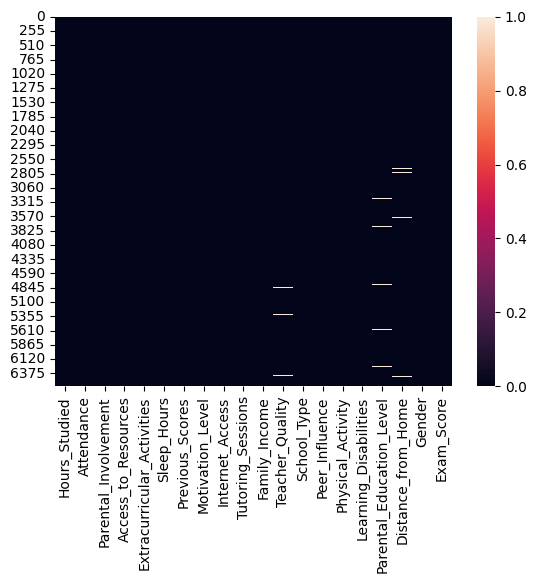

In [ ]:
sns.heatmap(student_data.isnull())

Imputation des variables manquantes

In [ ]:
student_data.loc[student_data['Teacher_Quality'].isna(), 'Teacher_Quality'] = 'Medium'


In [ ]:
student_data.loc[student_data['Parental_Education_Level'].isna(), 'Parental_Education_Level'] = 'High School'

In [ ]:
student_data.loc[student_data['Distance_from_Home'].isna(), 'Distance_from_Home'] = 'Near'

In [ ]:
student_data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


Analyse univariée des variables quantitatives


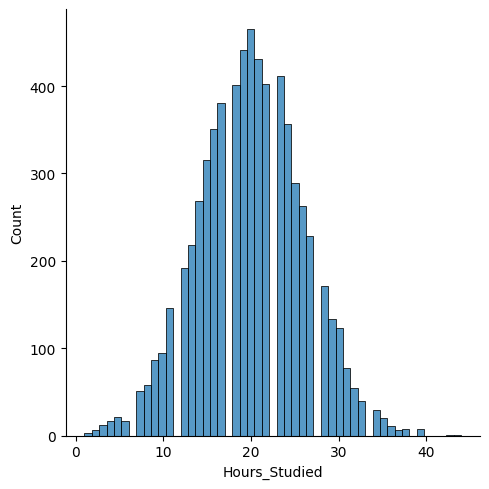

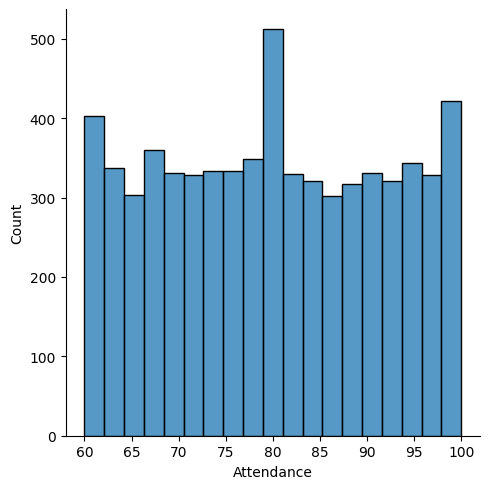

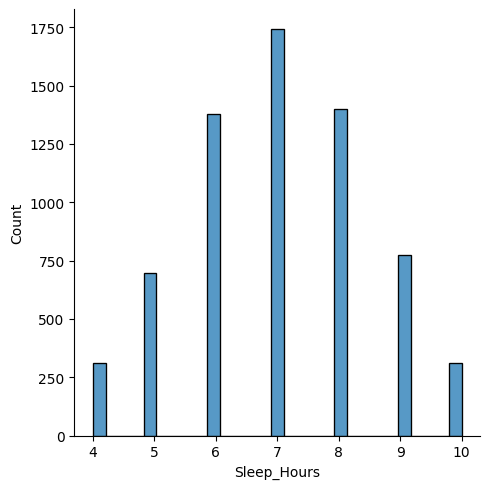

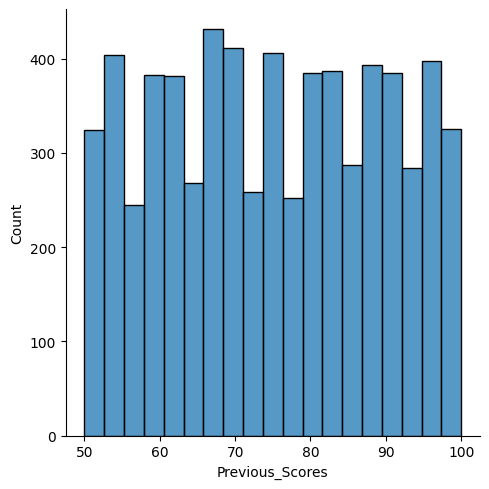

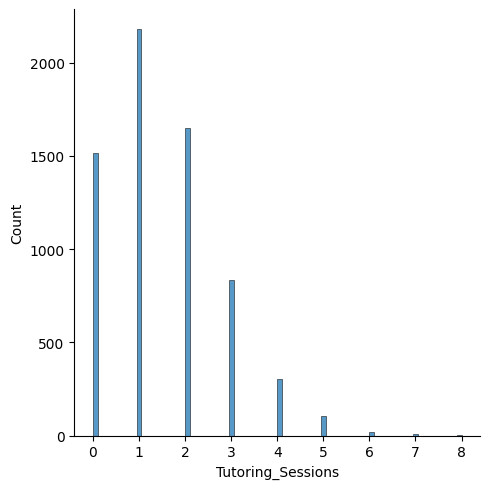

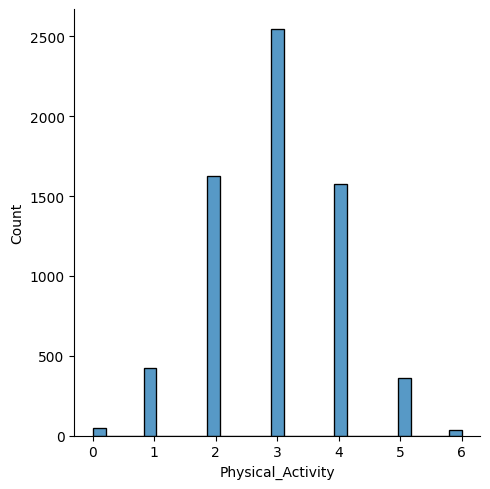

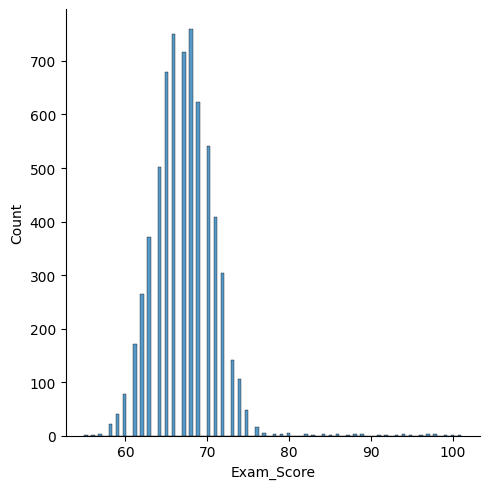

In [ ]:
for var in student_data.select_dtypes(exclude='object').columns:
    sns.displot(student_data[var])
    plt.show()

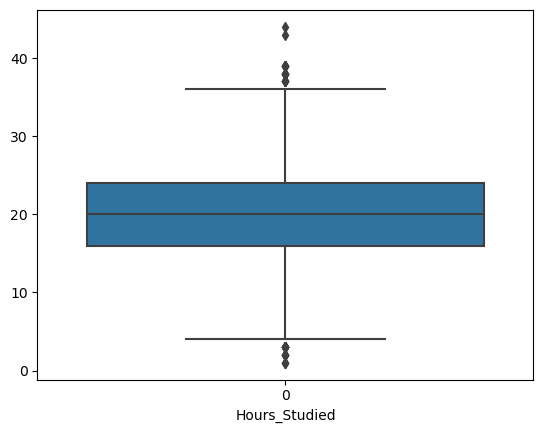

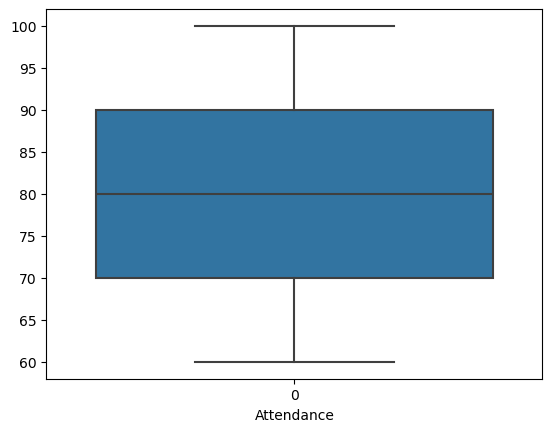

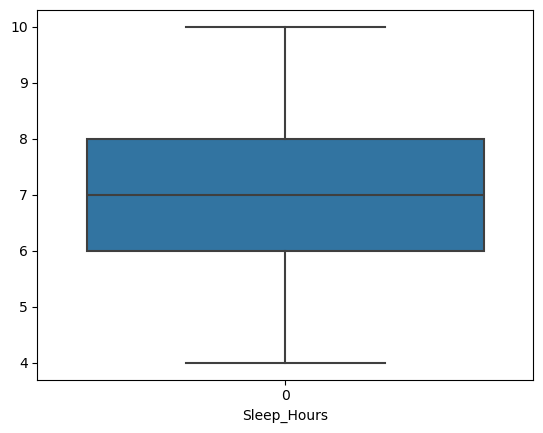

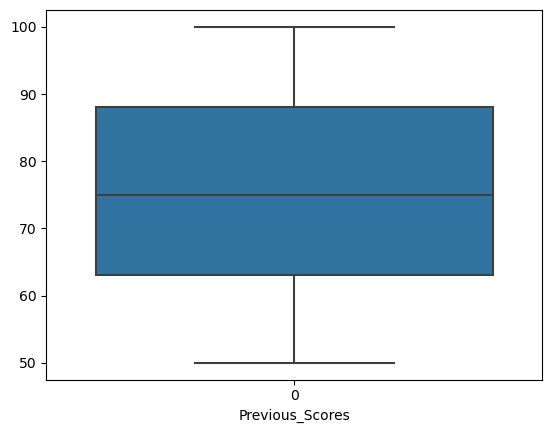

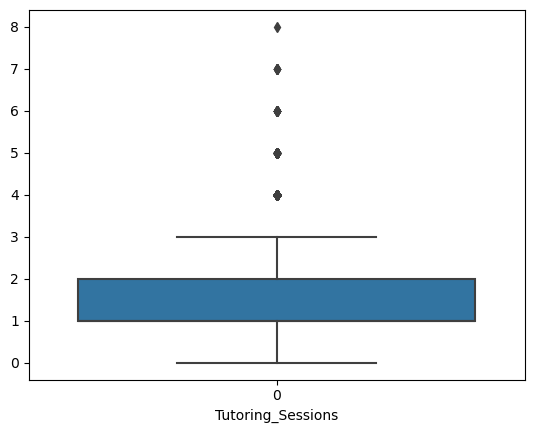

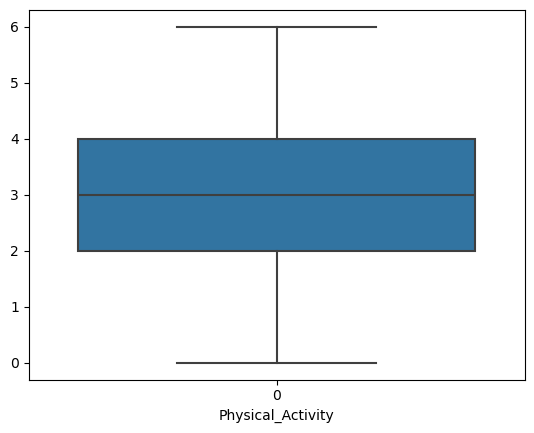

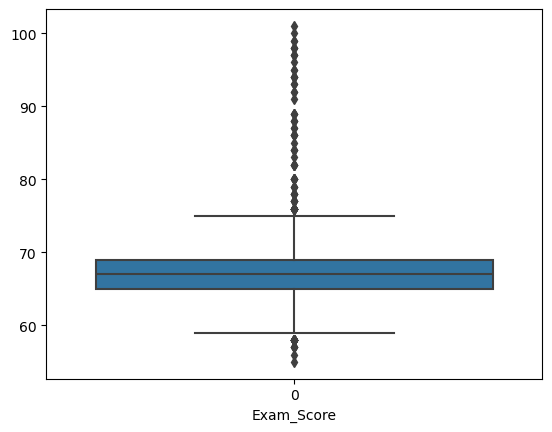

In [ ]:
for var in student_data.select_dtypes(exclude='object').columns:
    sns.boxplot(student_data[var])
    plt.xlabel(f'{var}')
    plt.show()

Analysde univariée des variables categorielles

<ipython-input-36-a3aa24208b3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(student_data,x=student_data[var],palette='Set2')


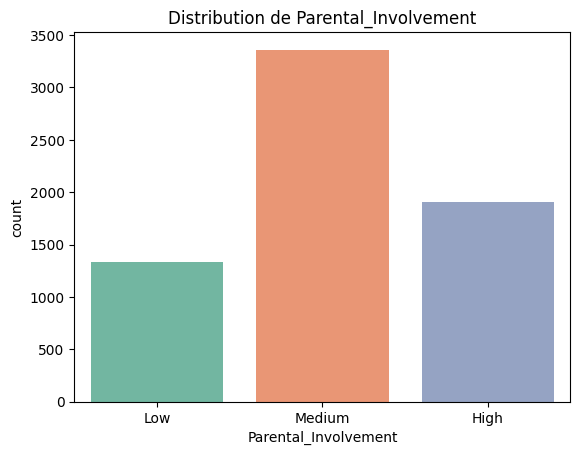

<ipython-input-36-a3aa24208b3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(student_data,x=student_data[var],palette='Set2')


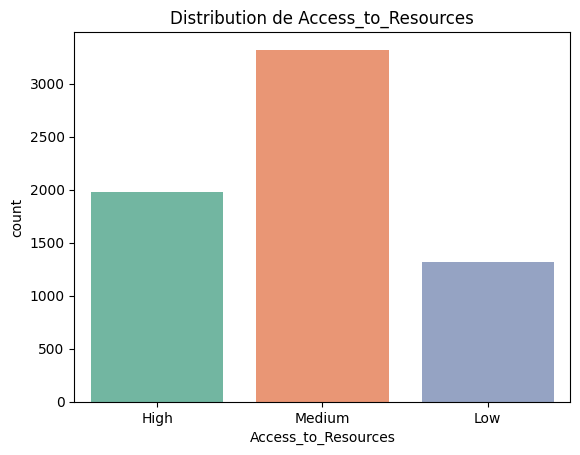

<ipython-input-36-a3aa24208b3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(student_data,x=student_data[var],palette='Set2')


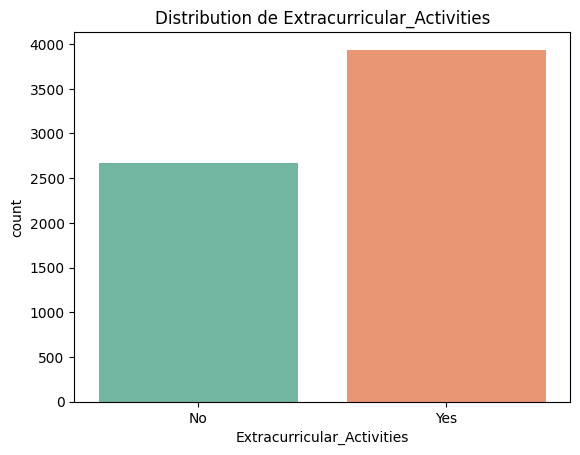

<ipython-input-36-a3aa24208b3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(student_data,x=student_data[var],palette='Set2')


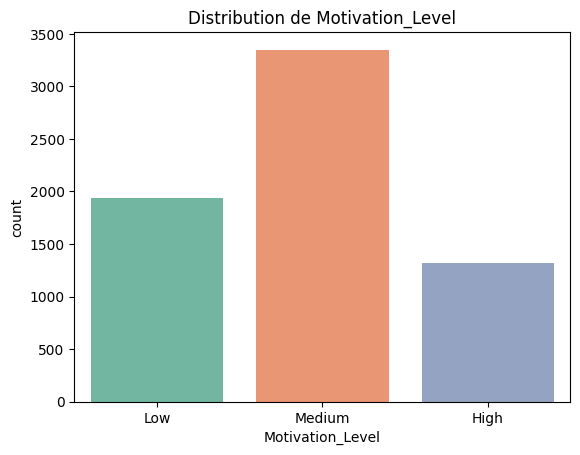

<ipython-input-36-a3aa24208b3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(student_data,x=student_data[var],palette='Set2')


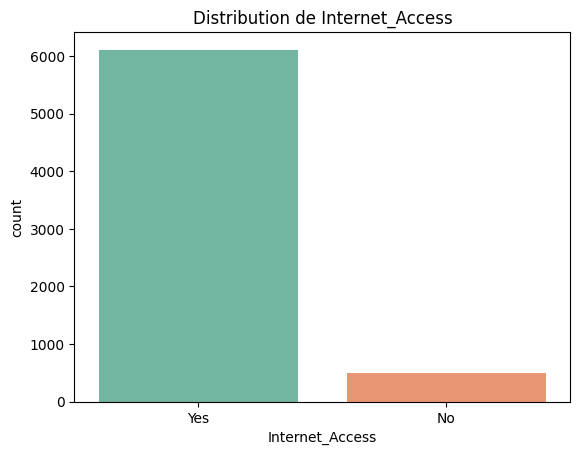

<ipython-input-36-a3aa24208b3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(student_data,x=student_data[var],palette='Set2')


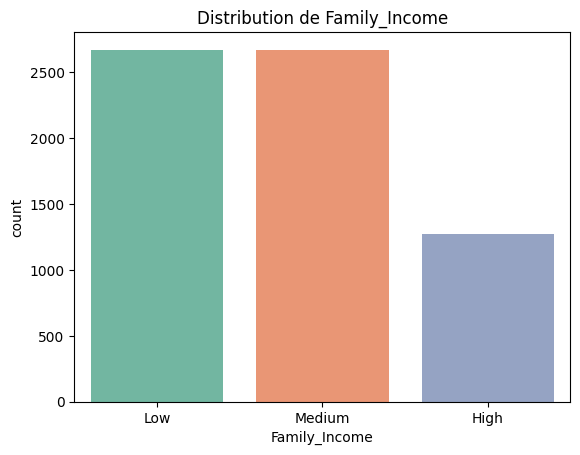

<ipython-input-36-a3aa24208b3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(student_data,x=student_data[var],palette='Set2')


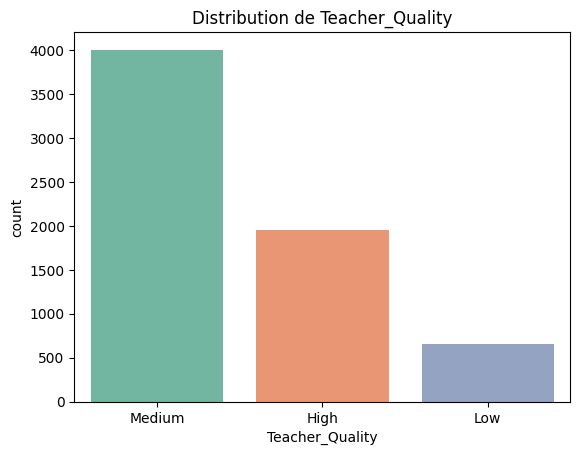

<ipython-input-36-a3aa24208b3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(student_data,x=student_data[var],palette='Set2')


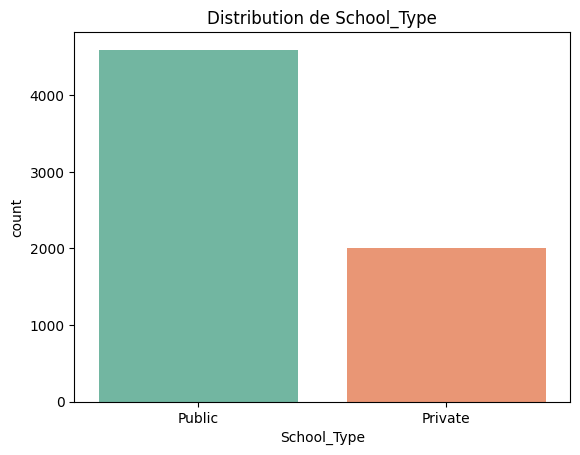

<ipython-input-36-a3aa24208b3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(student_data,x=student_data[var],palette='Set2')


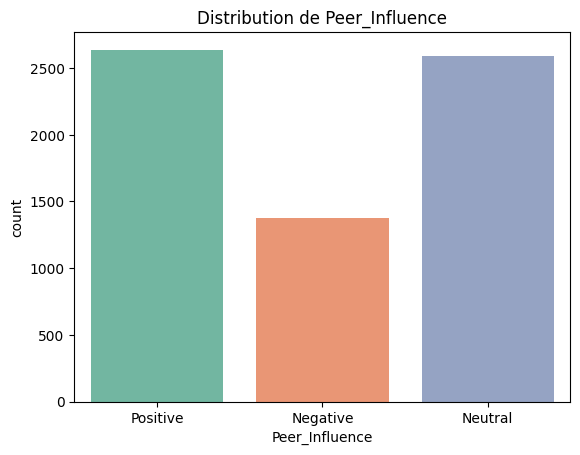

<ipython-input-36-a3aa24208b3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(student_data,x=student_data[var],palette='Set2')


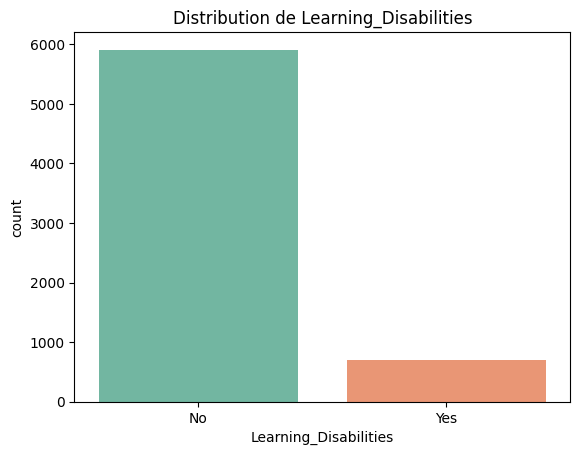

<ipython-input-36-a3aa24208b3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(student_data,x=student_data[var],palette='Set2')


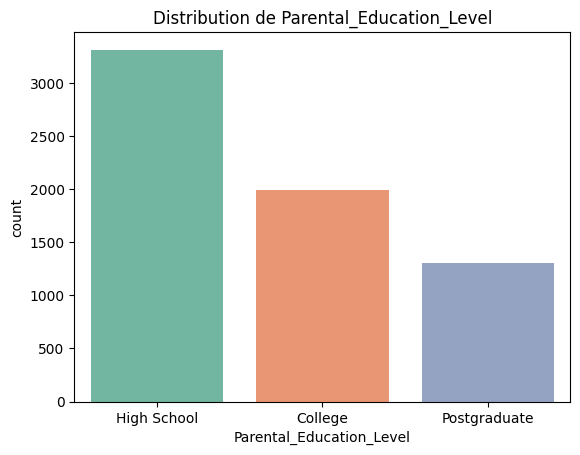

<ipython-input-36-a3aa24208b3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(student_data,x=student_data[var],palette='Set2')


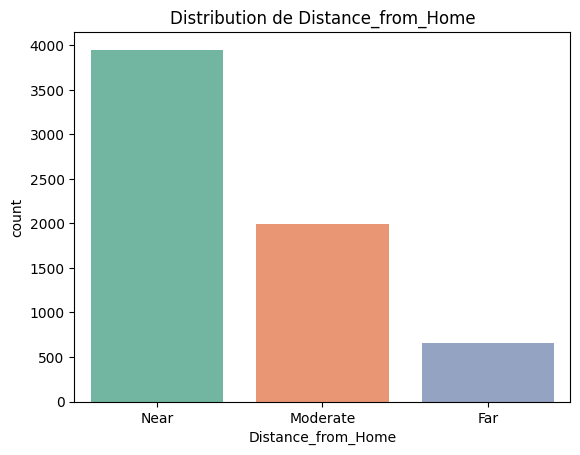

<ipython-input-36-a3aa24208b3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(student_data,x=student_data[var],palette='Set2')


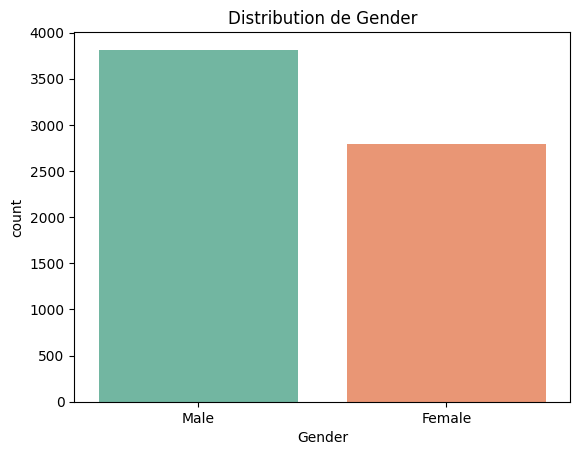

In [ ]:
for var in student_data.select_dtypes(include='object'):
    sns.countplot(student_data,x=student_data[var],palette='Set2')
    plt.title(f'Distribution de {var}')
    plt.xlabel(f'{var}')
    plt.show()

Analyse bivariée entre les variables categorielles et la variable target : Exam_Score

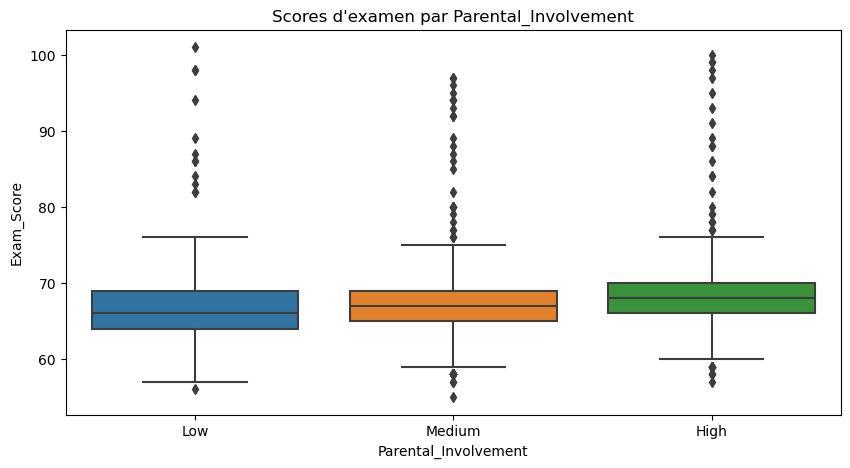

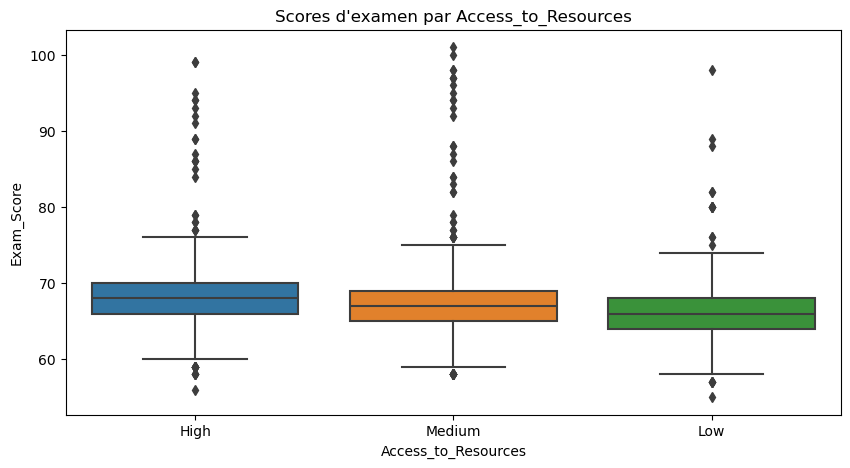

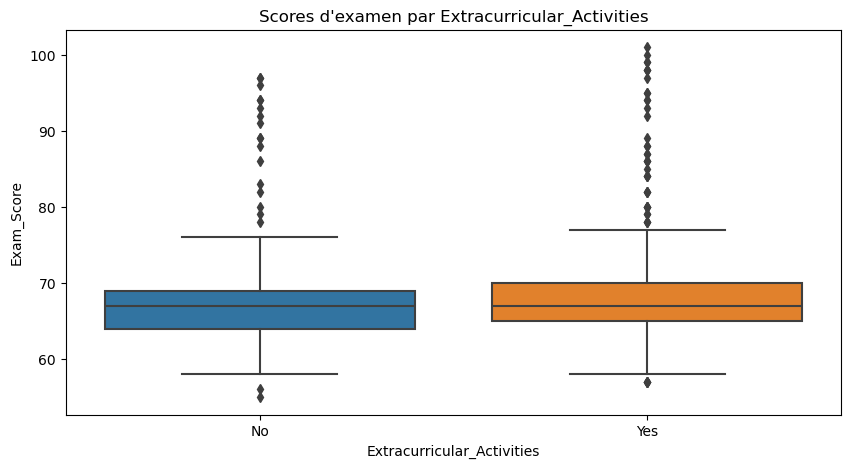

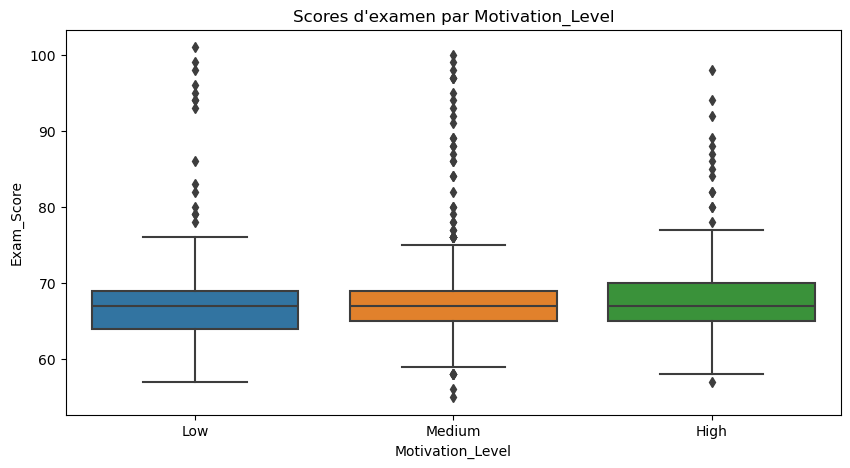

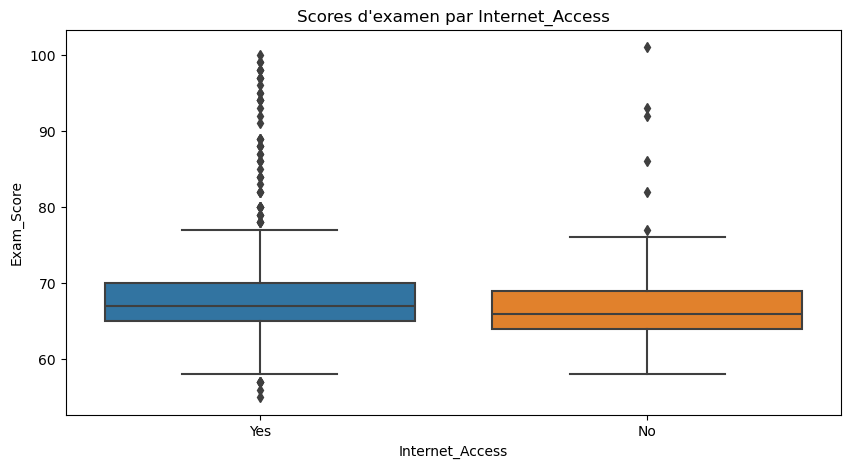

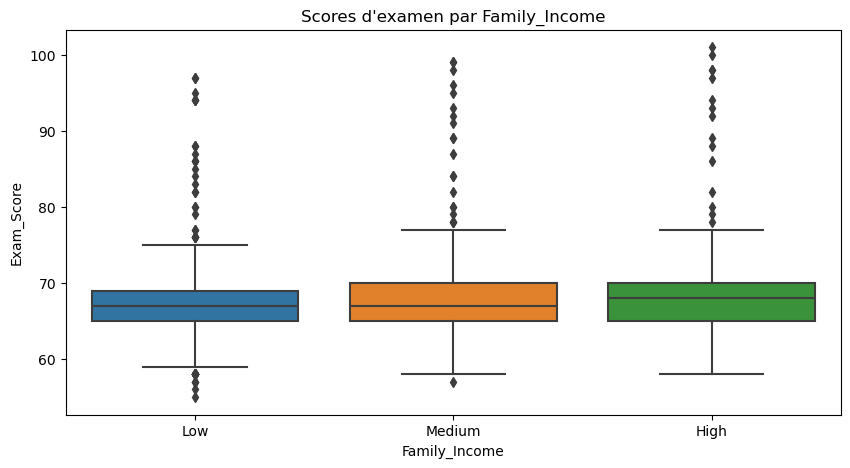

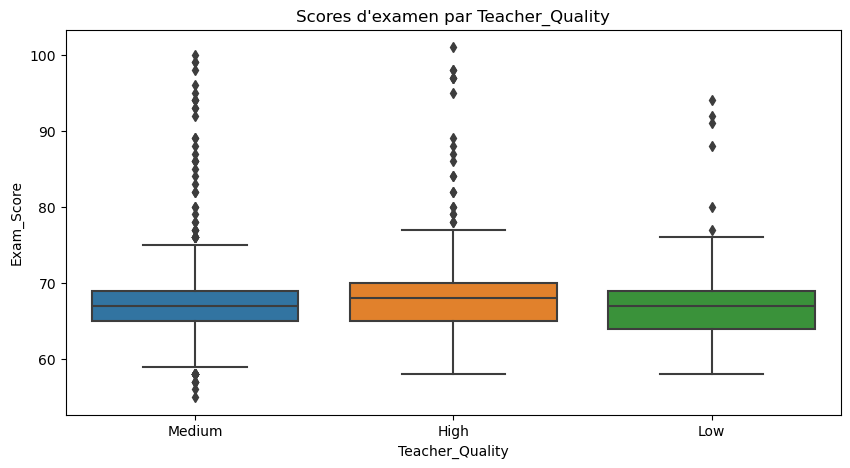

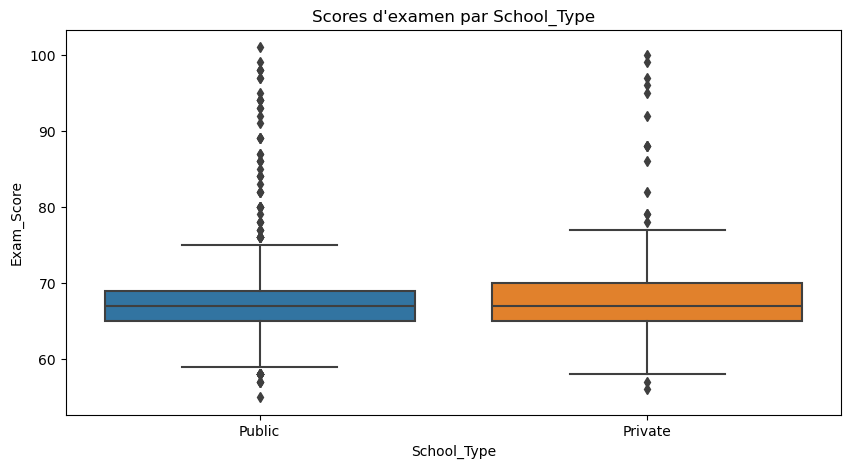

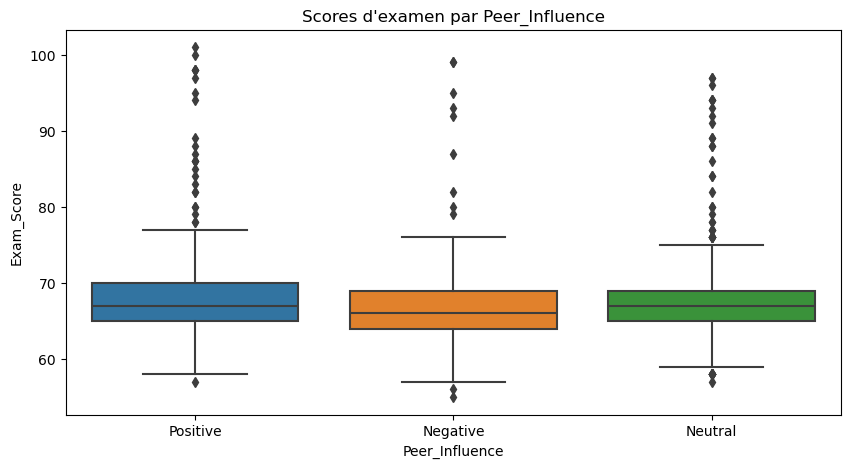

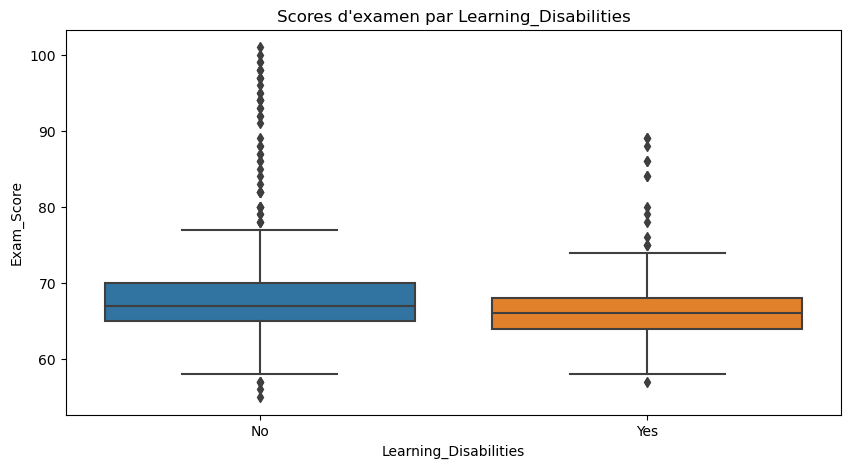

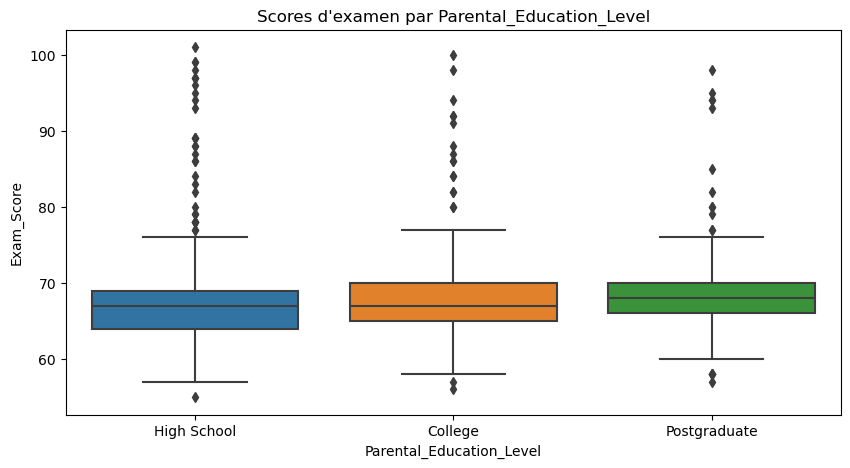

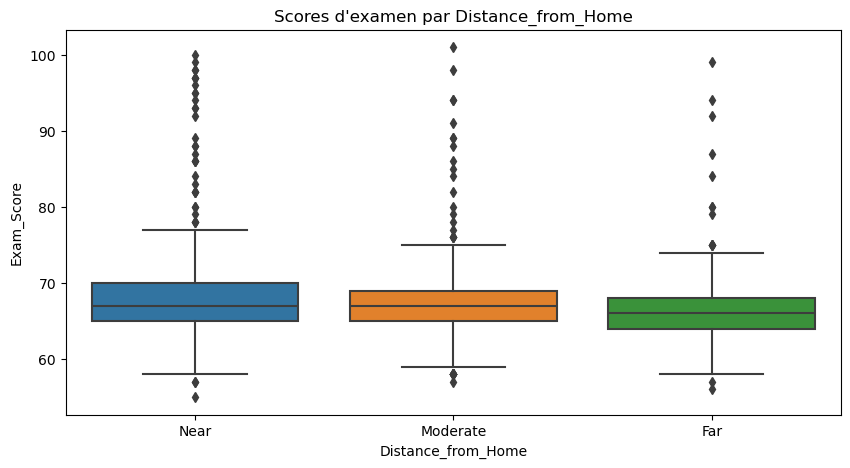

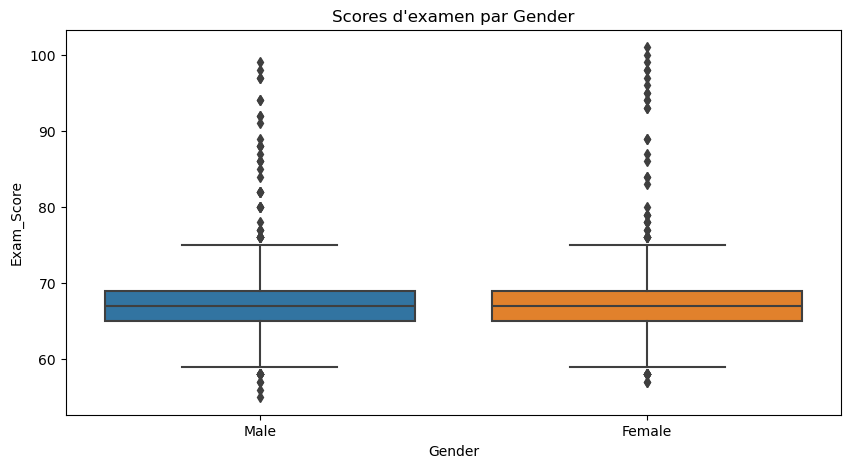

In [ ]:
for var in student_data.select_dtypes(include='object'):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=var, y='Exam_Score', data=student_data)
    plt.title(f"Scores d'examen par {var}")
    plt.xlabel(f"{var}")
    plt.ylabel("Exam_Score")
    plt.show()

Analyse bivariée entre les variables numeriques et la variable categorielle : Exam Score

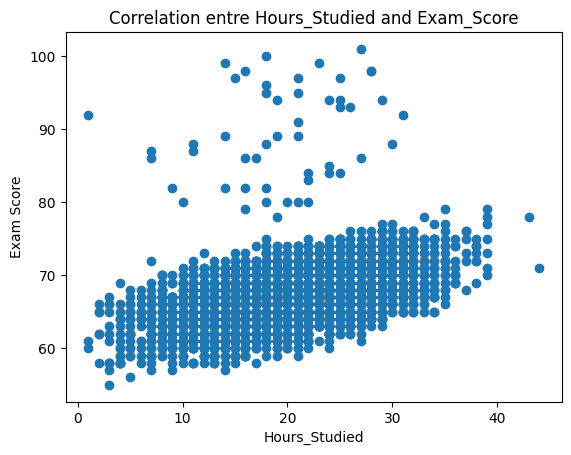

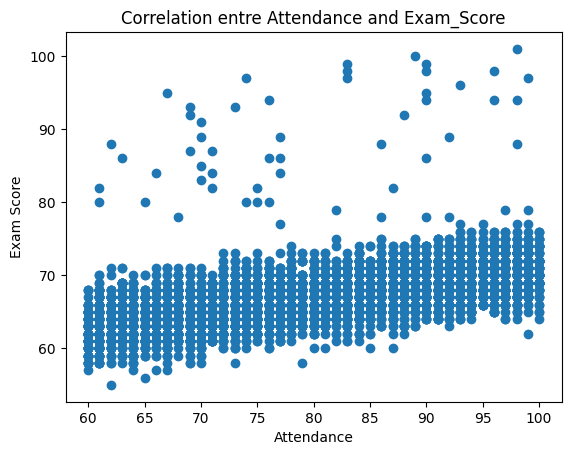

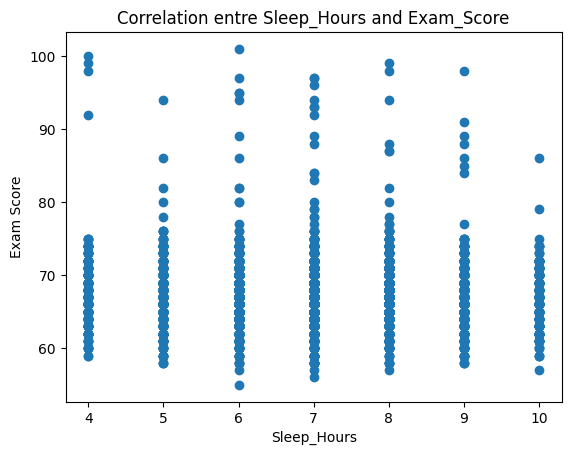

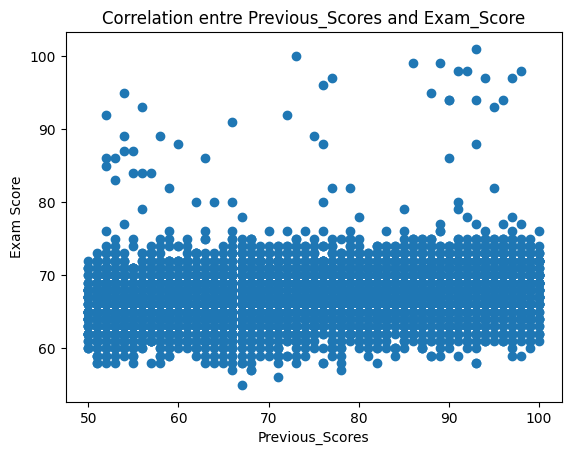

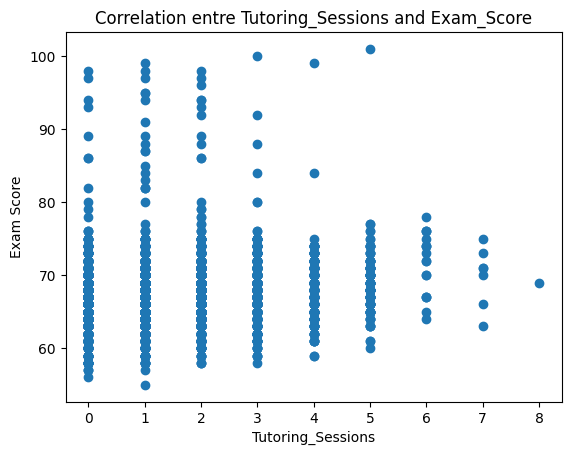

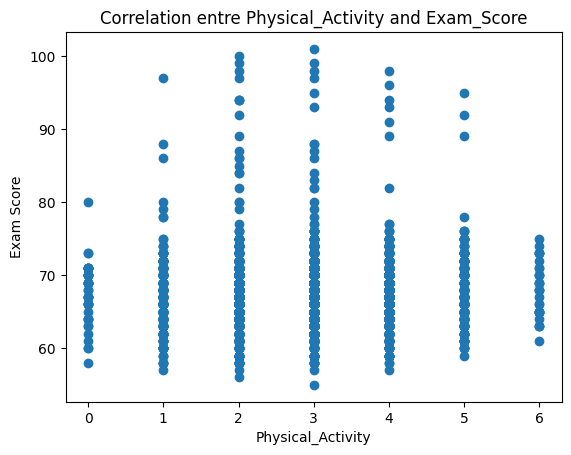

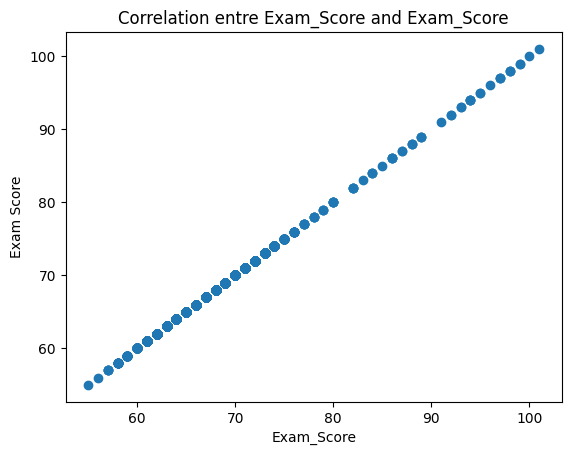

In [ ]:
for var in student_data.select_dtypes(exclude='object'):
    plt.scatter(student_data[var],student_data['Exam_Score'])
    plt.xlabel(f'{var}')
    plt.ylabel('Exam Score')
    plt.title(f'Correlation entre {var} and Exam_Score')
    plt.show()

Analyse du score moyen par differentes categories


In [ ]:
for var in student_data.select_dtypes(include='object').columns:
    avg_score = student_data.groupby(student_data[var])['Exam_Score'].mean()
    print(f"la moyenne par categorie de {var} est :\n {avg_score}")
    print("---------------------------------------------")




la moyenne par categorie de Parental_Involvement est :
 Parental_Involvement
High      68.092767
Low       66.358265
Medium    67.098156
Name: Exam_Score, dtype: float64
---------------------------------------------
la moyenne par categorie de Access_to_Resources est :
 Access_to_Resources
High      68.092152
Low       66.203351
Medium    67.134378
Name: Exam_Score, dtype: float64
---------------------------------------------
la moyenne par categorie de Extracurricular_Activities est :
 Extracurricular_Activities
No     66.931435
Yes    67.441849
Name: Exam_Score, dtype: float64
---------------------------------------------
la moyenne par categorie de Motivation_Level est :
 Motivation_Level
High      67.704321
Low       66.752194
Medium    67.330648
Name: Exam_Score, dtype: float64
---------------------------------------------
la moyenne par categorie de Internet_Access est :
 Internet_Access
No     66.535070
Yes    67.292895
Name: Exam_Score, dtype: float64
--------------------------

correlation entre les variables numeriques


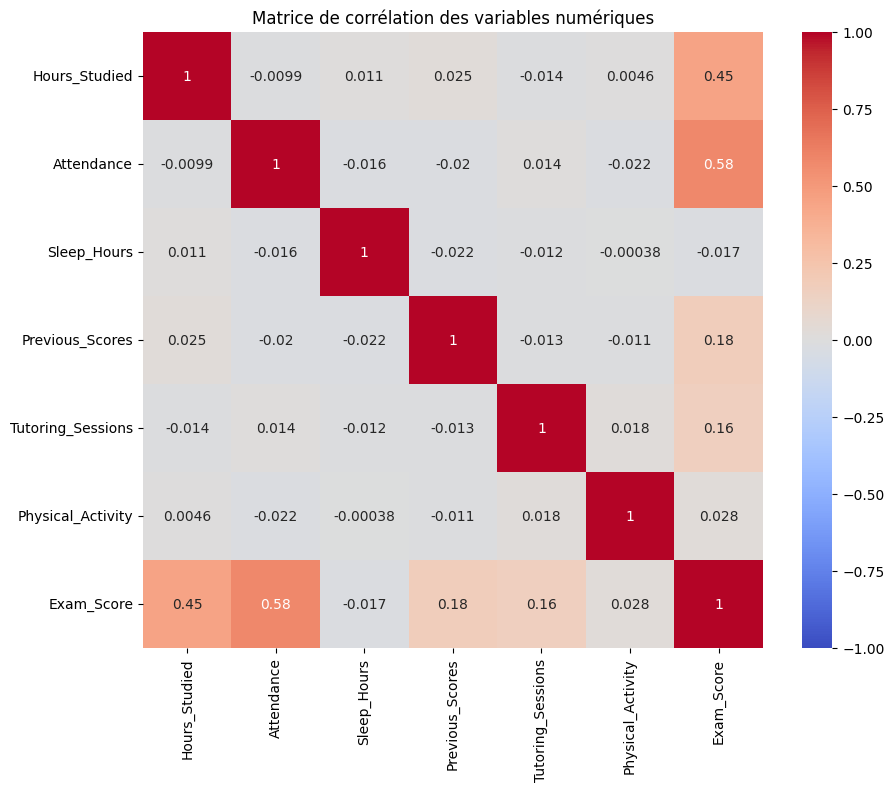

In [ ]:
correlation_matrix = student_data.select_dtypes(exclude='object').corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,cmap='coolwarm',annot=True, vmin=-1, vmax=1, annot_kws={"size": 10})

plt.title("Matrice de corrélation des variables numériques")
plt.show()

Encodade des variables categorielles

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_columns = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level',
                   'Family_Income', 'Teacher_Quality', 'Parental_Education_Level',
                   'Distance_from_Home', 'Peer_Influence']

ordinal_categories = [
    ['Low', 'Medium', 'High'],               # Parental_Involvement
    ['Low', 'Medium', 'High'],               # Access_to_Resources
    ['Low', 'Medium', 'High'],               # Motivation_Level
    ['Low', 'Medium', 'High'],               # Family_Income
    ['Low', 'Medium', 'High'],               # Teacher_Quality
    ['High School', 'College', 'Postgraduate'], # Parental_Education_Level
    ['Near', 'Moderate', 'Far'],             # Distance_from_Home
    ['Negative', 'Neutral', 'Positive']      # Peer_Influence
]

ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)

# Appliquer l'encodage ordinal aux colonnes spécifiques
student_data[ordinal_columns] = ordinal_encoder.fit_transform(student_data[ordinal_columns])

# Afficher les premières lignes pour vérifier
student_data.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0.0,2.0,No,7,73,0.0,Yes,0,0.0,1.0,Public,2.0,3,No,0.0,0.0,Male,67
1,19,64,0.0,1.0,No,8,59,0.0,Yes,2,1.0,1.0,Public,0.0,4,No,1.0,1.0,Female,61
2,24,98,1.0,1.0,Yes,7,91,1.0,Yes,2,1.0,1.0,Public,1.0,4,No,2.0,0.0,Male,74
3,29,89,0.0,1.0,Yes,8,98,1.0,Yes,1,1.0,1.0,Public,0.0,4,No,0.0,1.0,Male,71
4,19,92,1.0,1.0,Yes,6,65,1.0,Yes,3,1.0,2.0,Public,1.0,4,No,1.0,0.0,Female,70


In [ ]:
# Liste des variables nominales (sans ordre spécifique)
nominal_columns = ['Extracurricular_Activities', 'Internet_Access', 'School_Type',
                   'Learning_Disabilities', 'Gender']


In [ ]:
# Appliquer get_dummies
final_student_data = pd.get_dummies(student_data, columns=nominal_columns,drop_first=True)
# Convertir les colonnes booléennes en entiers (0 et 1)
final_student_data = final_student_data.astype(int)




In [ ]:
final_student_data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Learning_Disabilities_Yes,Gender_Male
0,23,84,0,2,7,73,0,0,0,1,2,3,0,0,67,0,1,1,0,1
1,19,64,0,1,8,59,0,2,1,1,0,4,1,1,61,0,1,1,0,0
2,24,98,1,1,7,91,1,2,1,1,1,4,2,0,74,1,1,1,0,1
3,29,89,0,1,8,98,1,1,1,1,0,4,0,1,71,1,1,1,0,1
4,19,92,1,1,6,65,1,3,1,2,1,4,1,0,70,1,1,1,0,0
